## Import libraries

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode
from pyzbar.pyzbar import ZBarSymbol

%matplotlib inline

## Read and show image

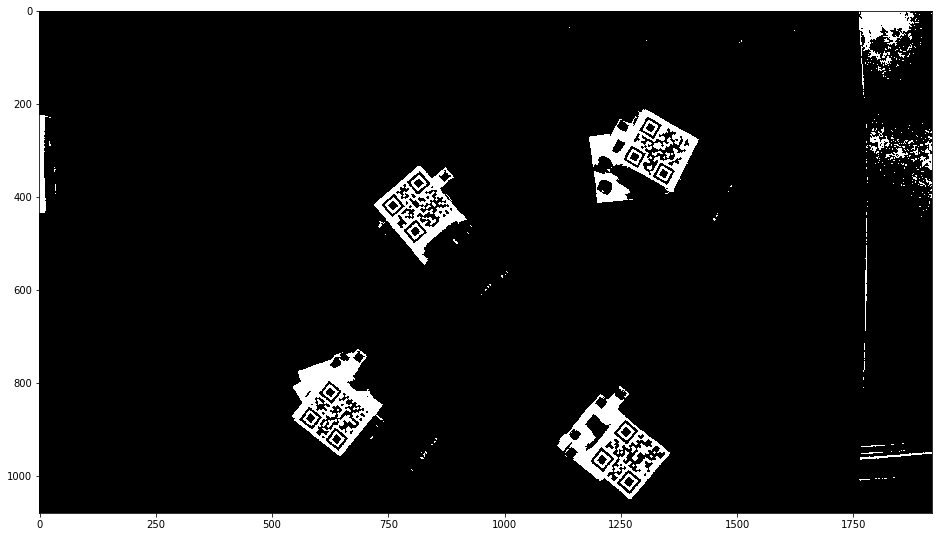

In [72]:
def show(img, cmap='gray'):
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(img,cmap)

img = cv2.imread(r'C:\Users\lstyl\Desktop\CE\CV\imgs\1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgflt = cv2.medianBlur(img, 3) > 190

show(imgflt)

## Detection qrcodes

[Point(x=559, y=879), Point(x=644, y=947), Point(x=708, y=863), Point(x=624, y=796)]
[-85, -68]
[Point(x=1184, y=969), Point(x=1271, y=1040), Point(x=1345, y=951), Point(x=1261, y=879)]
[-87, -71]
[Point(x=736, y=418), Point(x=807, y=501), Point(x=890, y=428), Point(x=818, y=346)]
[-71, -83]
[Point(x=1256, y=322), Point(x=1351, y=376), Point(x=1401, y=283), Point(x=1308, y=228)]
[-95, -54]


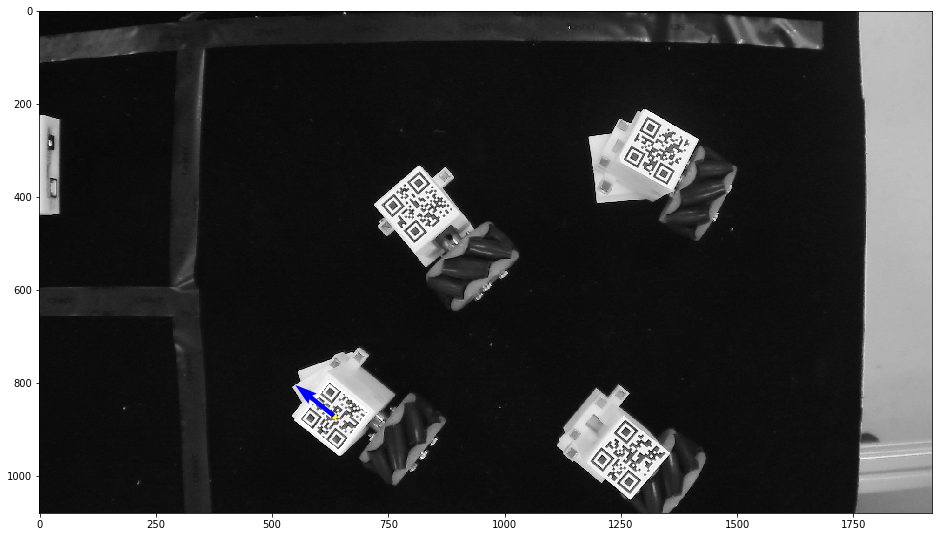

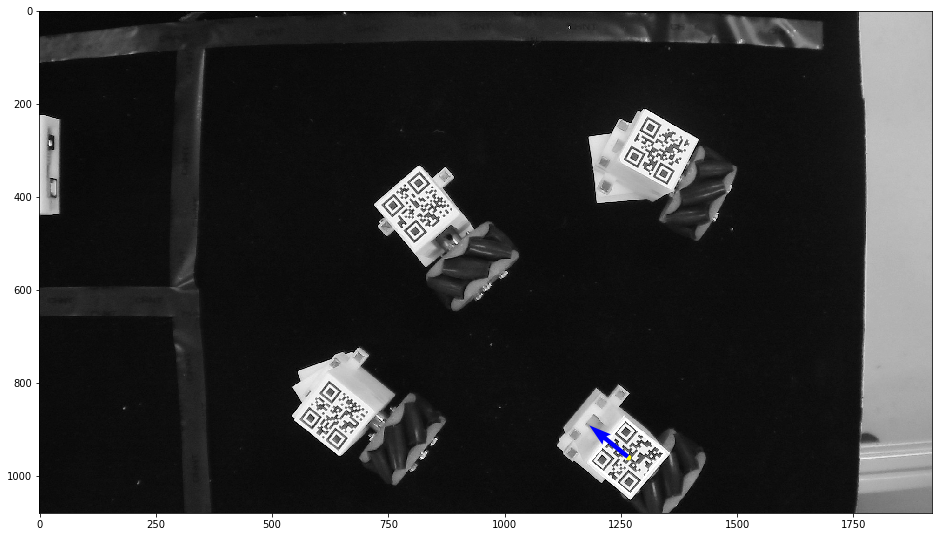

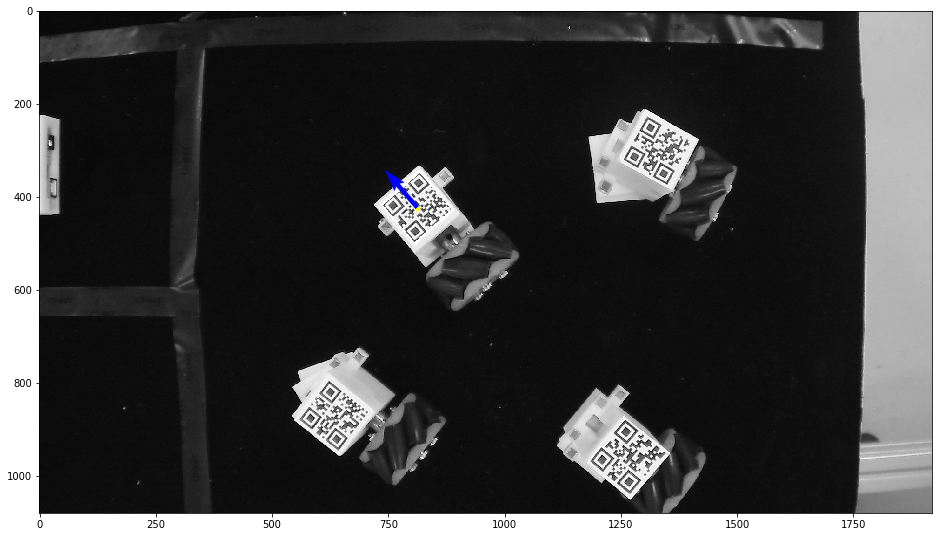

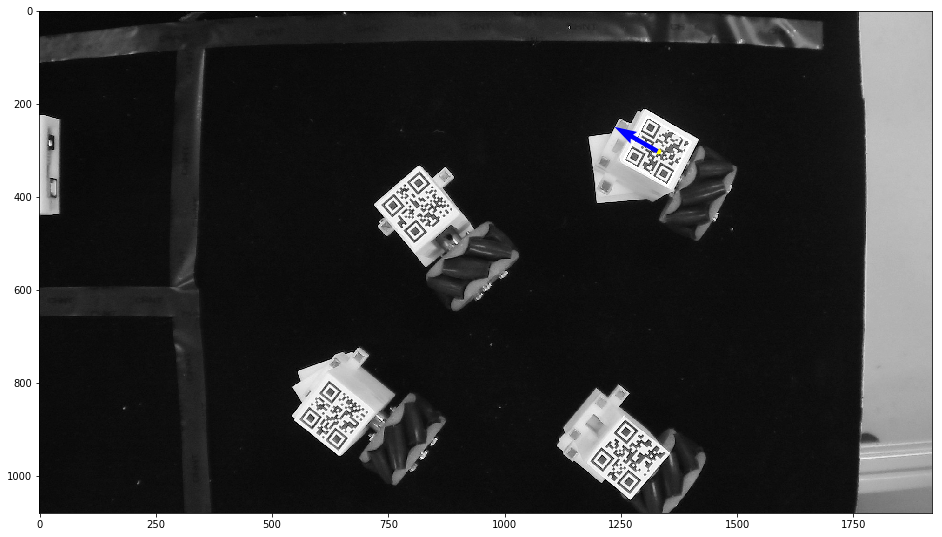

In [73]:
#img2 = imgflt[:,500:1500]
(_, thresh) = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY) # 二值化
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))#形态学处理，定义矩形结构
#closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)#闭运算，先膨胀后腐蚀
#closed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)#开运算，先腐蚀后膨胀
#closed = cv2.erode(thresh, kernel, iterations = 1)#腐蚀图像，去除噪声点
closed = cv2.dilate(thresh, kernel, iterations = 1)#膨胀图像，连接断点

qr = decode(closed)

# Draw rectangle boundaries with four vertices
mid_points = np.zeros((4,2))
orient = np.zeros((4,2))
for i in range(len(qr)):  
    points = qr[i].polygon
    draw_box = img.copy()
    cv2.polylines(draw_box, np.int32([points]), True, (255, 0, 0), 3)
    show(draw_box)
    print(points)
    
    # Find middle point of qrcode
    pt_mid = np.mean(points, axis=0)
    pt_mid = np.int32(pt_mid)
    ptx = pt_mid[0]
    pty = pt_mid[1]
    
    mid_points[int(qr[i][0])] = pt_mid
    
    
    # Plot middle point
    plt.scatter(ptx, pty, s=20, c='yellow')
    
    # Draw orientation of qrcode
    vx = points[0][0] - points[1][0]
    vy = points[0][1] - points[1][1]
    plt.quiver(ptx, pty, vx, vy, scale_units=None, angles='xy', color='blue', width=0.005)
    plt.show
    orient[int(qr[i][0])] = [vx, vy]
    print([vx,vy])